In [58]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import AR
from numpy import mean
from sklearn.metrics import mean_squared_error

import statsmodels
from math import sqrt

In [67]:
statsmodels.__version__

'0.14.0'

In [59]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

In [60]:
no2 = pd.read_csv('data/NO2.csv')
print(no2.head(2))

              datetime  NO2 (Biossido di azoto)
0  2020-01-01 00:00:00                     16.0
1   2020-01-01 1:00:00                     26.0


In [61]:
no2['datetime'] = pd.to_datetime(no2['datetime'])

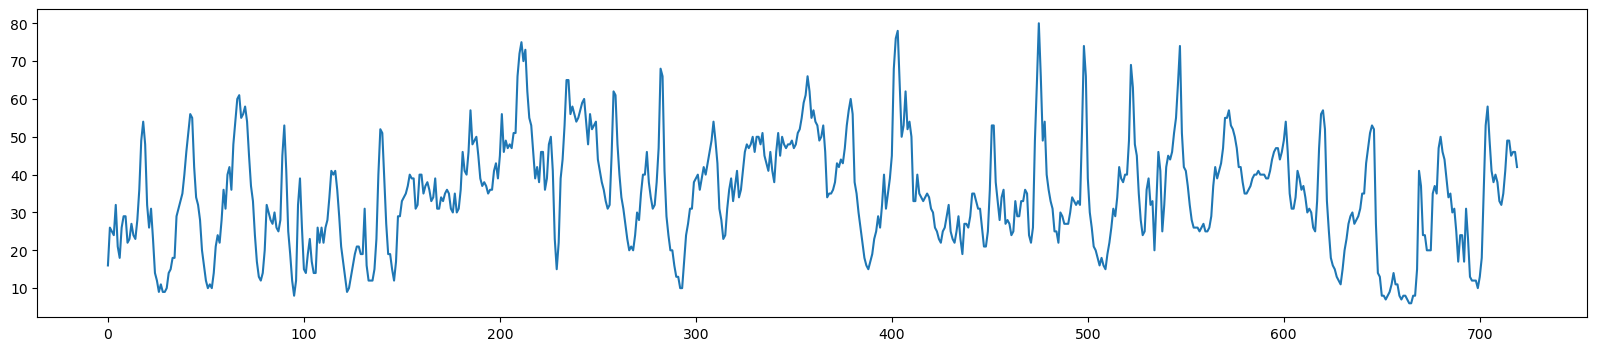

In [62]:
plt.figure(figsize = (20, 4))
plt.plot(no2['NO2 (Biossido di azoto)'][:720])
plt.show()

In [63]:
series = no2['NO2 (Biossido di azoto)']
# split dataset
prediction_period = 40
X = series.values
train, test = X[1:(len(X)- prediction_period)], X[len(X)-prediction_period:]

In [64]:
print(len(train))
print(len(test))

6894
40


In [65]:
# train autoregression
model = statsmodels.tsa.ar_model.AutoReg(train, lags = 24)
model_fit = model.fit()
print('Lag: %s' % model_fit)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

Lag: <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x289a457e0>
Coefficients: [ 0.67752964  1.11196289 -0.41128425  0.11987418 -0.03567528  0.00964192
  0.02464996 -0.02314974  0.02323594 -0.00690103  0.02470132  0.02728005
  0.02542333 -0.00554376 -0.00578062 -0.03346761  0.00859977 -0.01913045
 -0.01675417  0.01945793  0.00782692 -0.00162085  0.01585526  0.11487625
 -0.00549752]


In [66]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=71.249890, expected=75.000000
predicted=57.359693, expected=60.000000
predicted=46.587528, expected=55.000000
predicted=40.159603, expected=48.000000
predicted=36.504280, expected=47.000000
predicted=35.577066, expected=52.000000
predicted=37.379028, expected=35.000000
predicted=41.745622, expected=38.000000
predicted=48.602903, expected=65.000000
predicted=55.728801, expected=75.000000
predicted=60.547361, expected=74.000000
predicted=59.516570, expected=51.000000
predicted=53.942769, expected=48.000000
predicted=47.520672, expected=52.000000
predicted=40.618912, expected=49.000000
predicted=34.741054, expected=38.000000
predicted=31.184226, expected=27.000000
predicted=30.008323, expected=26.000000
predicted=31.363549, expected=23.000000
predicted=34.572727, expected=16.000000
predicted=40.858660, expected=30.000000
predicted=48.416559, expected=50.000000
predicted=54.431857, expected=55.000000
predicted=56.311519, expected=45.000000
predicted=54.118020, expected=29.000000


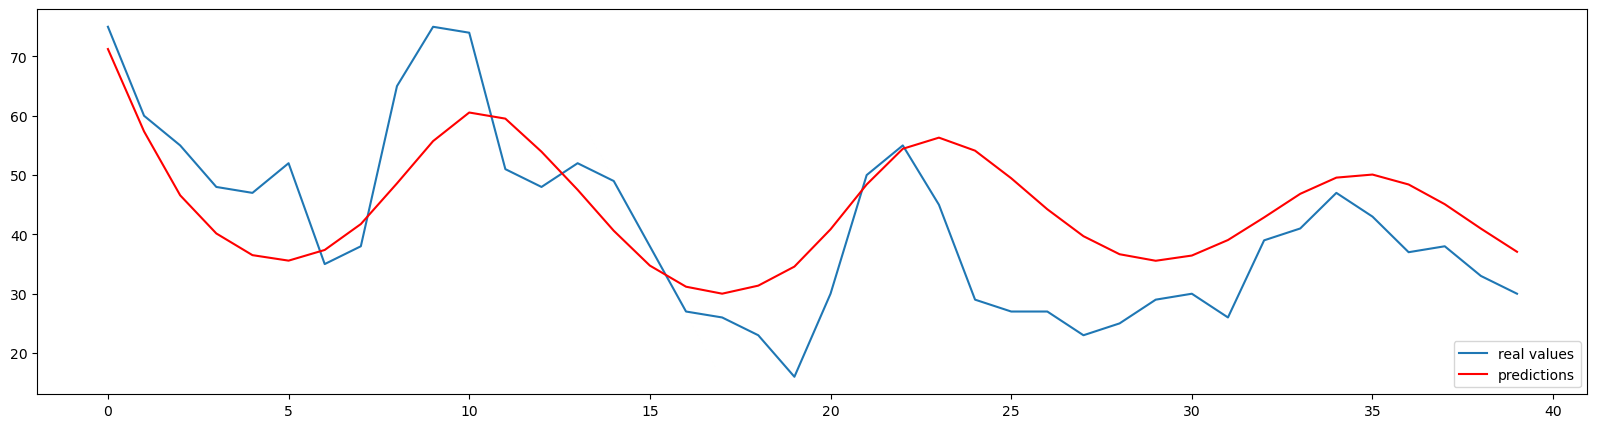

In [55]:
# plot results
plt.figure(figsize=(20, 5))
# Function add a legend  

plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(["real values", "predictions"], loc ="lower right")
plt.show()

### Compute the forecasting error

-  the performance measures provide a summary of the skill and capability of the model to make good predictions. 


-  there are many different performance measures, it depends on what you want to measure. 


-  confusing to know which measure to use and how to interpret the results. 



#### The most common forecasting performance measures are : 

-  MAE (Mean Absolute Error) 

-  RMSE (Root Mean Squared Error)

-  MPE (Mean Percentage Error)

-  MAPE (Mean Absolute Percentage Error)

In [56]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 10.935


## MAPE

In [57]:
import numpy as np
# Compute MAPE
mape = np.mean(np.abs((test- predictions) / test)) * 100

print(f'MAPE: {mape:.2f}%')

MAPE: 27.09%
